In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like 
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [5]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv',encoding='utf-8',thousands=',',names=['date','hit'],index_col = 0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


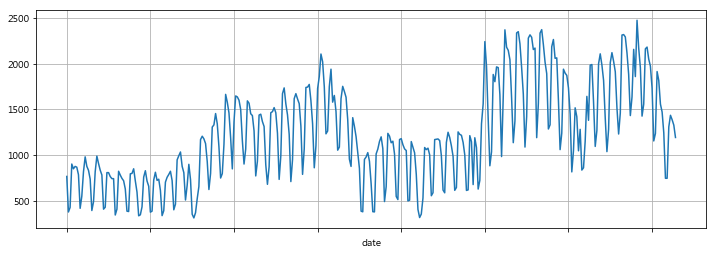

In [8]:
pinkwink_web['hit'].plot(figsize=(12,4),grid=True)

In [7]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0,time[-1],1000)

In [11]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [12]:
fp1 = np.polyfit(time,traffic,1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time,traffic,2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time,traffic,3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time,traffic,15)
f15 = np.poly1d(fp15)

print(error(f1,time,traffic))
print(error(f2,time,traffic))
print(error(f3,time,traffic))
print(error(f15,time,traffic))

430.85973081109637
430.62841018946955
429.53280466762925
330.47773062256385


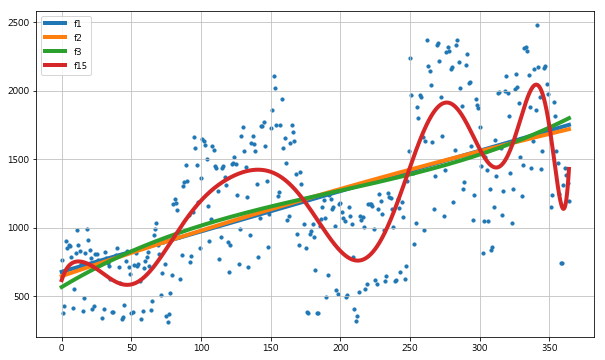

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(time,traffic, s=10)

plt.plot(fx,f1(fx),lw=4,label='f1')
plt.plot(fx,f2(fx),lw=4,label='f2')
plt.plot(fx,f3(fx),lw=4,label='f3')
plt.plot(fx,f15(fx),lw=4,label='f15')

plt.grid(True, linestyle='-',color='0.75')
plt.legend(loc=2)
plt.show()

In [23]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'],format='%y. %m. %d.')
del df['date']

m=Prophet(yearly_seasonality=True)
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [26]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,908.834085,693.025818,1109.275873
421,2017-08-26,493.803901,302.818728,718.877589
422,2017-08-27,626.384784,420.019637,850.120225
423,2017-08-28,1179.020376,966.240907,1414.799036
424,2017-08-29,1214.963184,1010.824249,1437.623925


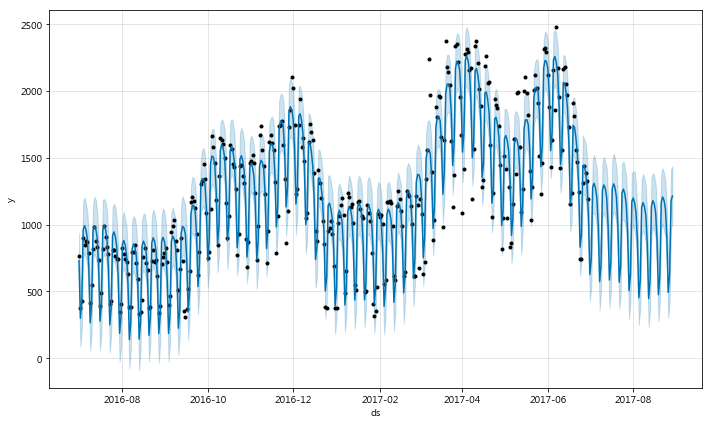

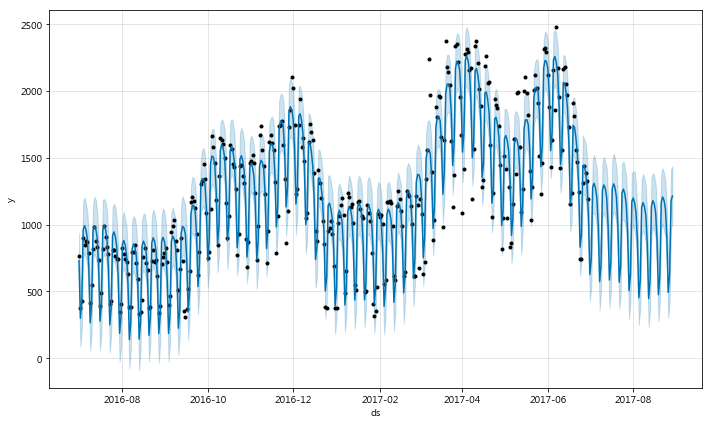

In [27]:
m.plot(forecast)

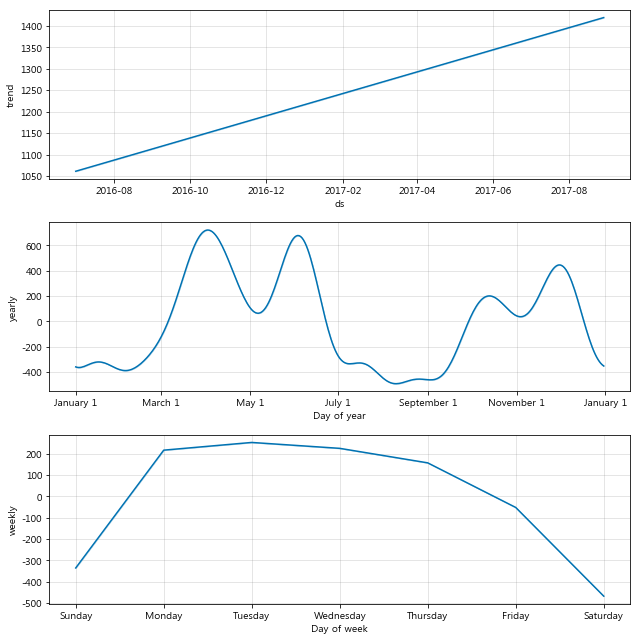

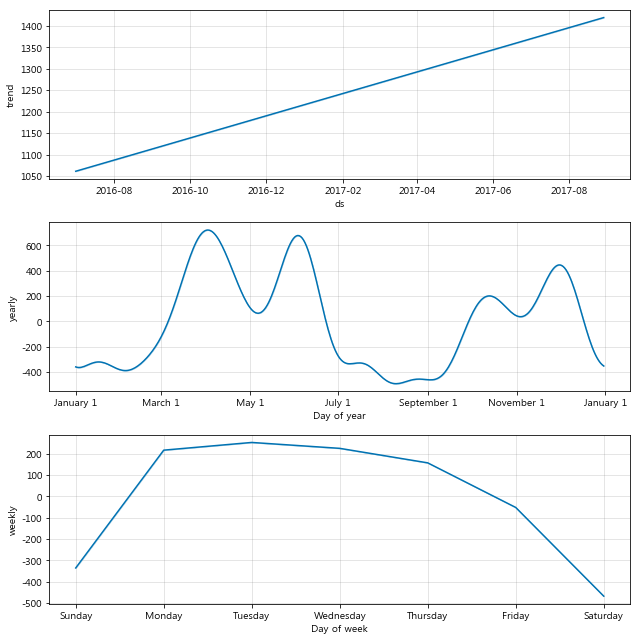

In [28]:
m.plot_components(forecast)

In [3]:
from pandas_datareader.google.daily import GoogleDailyReader

def url(self):
    return 'http://finance.google.com/finance/historical'

GoogleDailyReader.url = url

In [4]:
start = datetime(2003,1,1)
end = datetime(2017,6,30)

import fix_yahoo_finance as yf
data = yf.download('AAPL',start,end) #APPLE

[*********************100%***********************]  1 of 1 downloaded


In [5]:
aapl = pd.DataFrame({'date':data['Open'].index,'open':data['Open'].values, 'high':data['High'].values,'low':data['Low'].values,
                     'close':data['Close'].values,'volume':data['Volume'].values},index=data.index)

In [6]:
aapl.tail()

,date,open,high,low,close,volume
Date,,,,,,
2017-06-23,2017-06-23,145.130005,147.160004,145.110001,146.279999,35439400
2017-06-26,2017-06-26,147.169998,148.279999,145.380005,145.820007,25692400
2017-06-27,2017-06-27,145.009995,146.160004,143.619995,143.729996,24761900
2017-06-28,2017-06-28,144.490005,146.110001,143.160004,145.830002,22082400
2017-06-29,2017-06-29,144.710007,145.130005,142.279999,143.679993,31499400


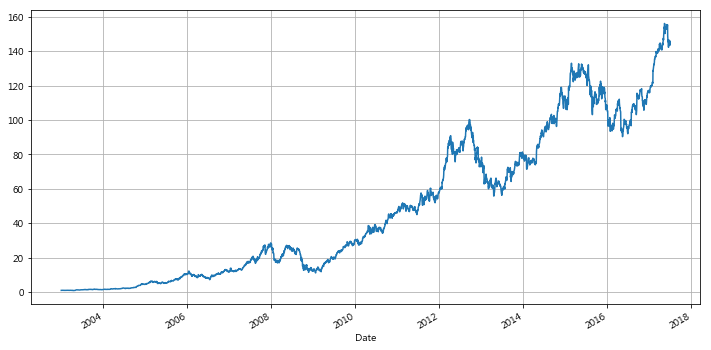

In [7]:
aapl['close'].plot(figsize=(12,6), grid=True)

In [8]:
aapl_trunc = aapl[:'2016-12-31']

In [9]:
df = pd.DataFrame({'ds':aapl_trunc.index,'y':aapl_trunc['close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2002-12-31,1.023571
1,2003-01-02,1.057143
2,2003-01-03,1.064286
3,2003-01-06,1.064286
4,2003-01-07,1.060714


In [10]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3886,2017-12-26
3887,2017-12-27
3888,2017-12-28
3889,2017-12-29
3890,2017-12-30


In [12]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3886,2017-12-26,124.216787,108.946987,139.989812
3887,2017-12-27,124.297042,109.273368,139.575438
3888,2017-12-28,124.278334,108.971857,139.531451
3889,2017-12-29,124.210408,109.037457,138.626664
3890,2017-12-30,124.837022,109.959556,140.173833


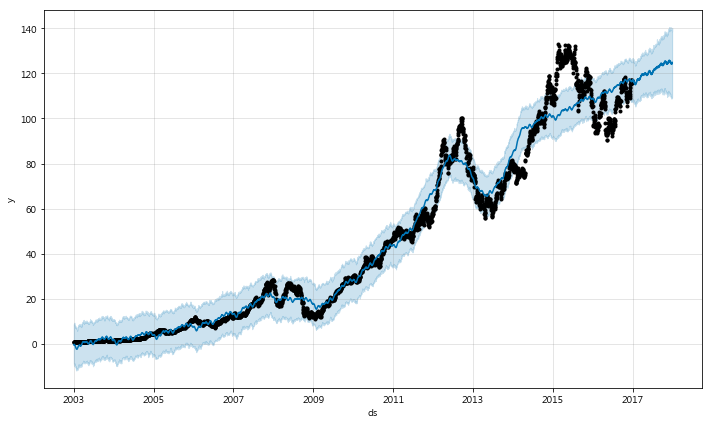

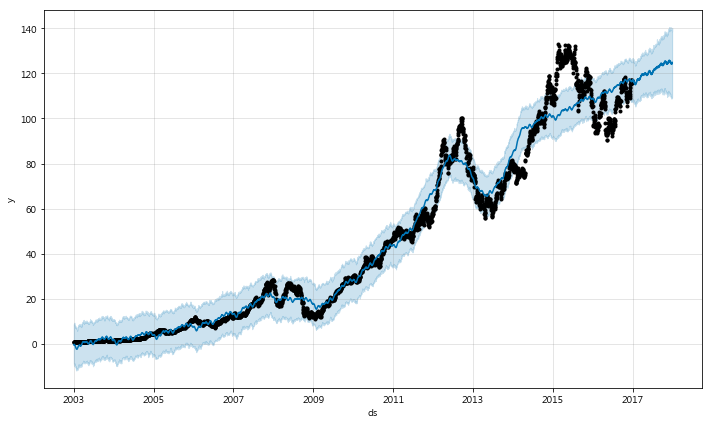

In [13]:
m.plot(forecast)

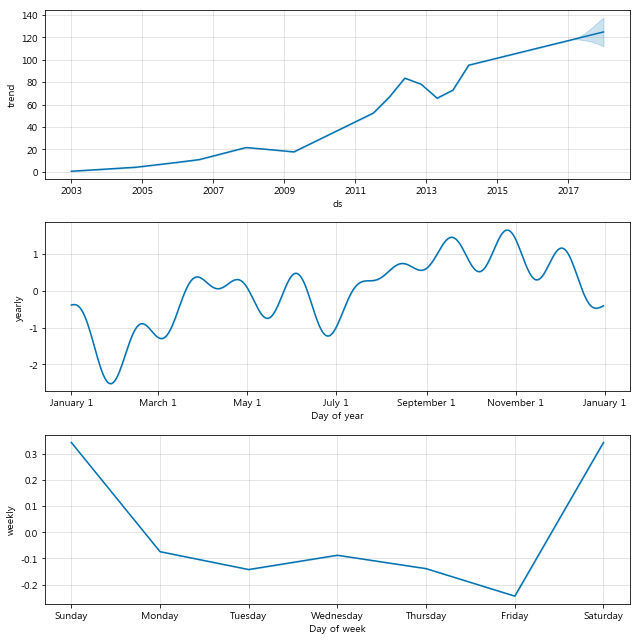

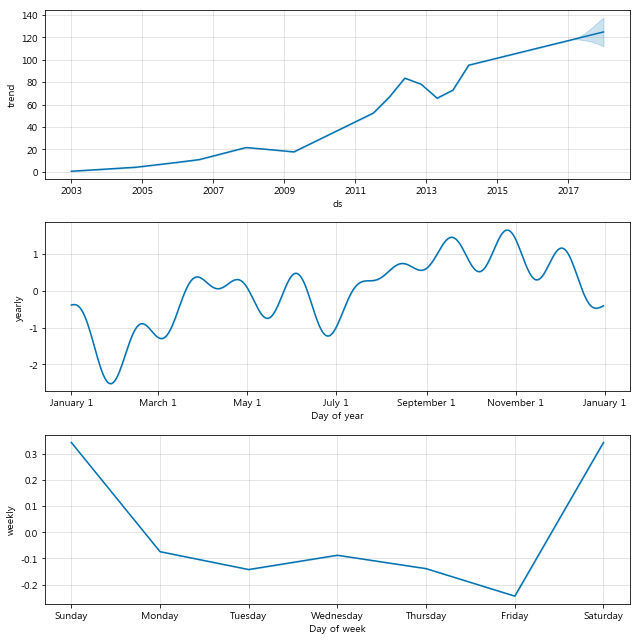

In [14]:
m.plot_components(forecast)

[*********************100%***********************]  1 of 1 downloaded


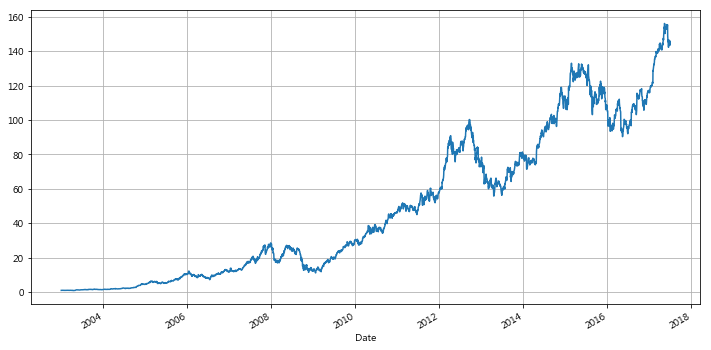

In [15]:
start = datetime(2014,1,1)
end = datetime(2017,7,31)

import fix_yahoo_finance as yf
data = yf.download('AAPL',start,end) #APPLE


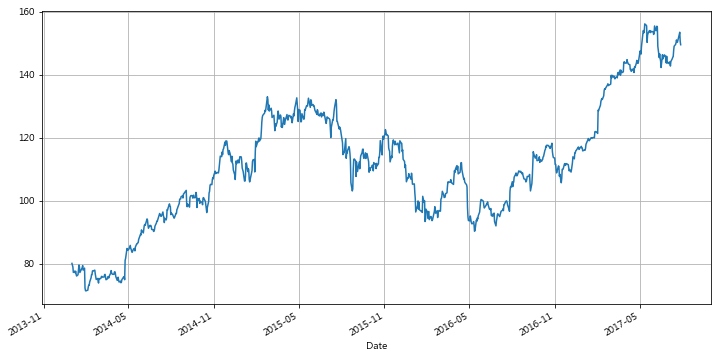

In [16]:
aapl = pd.DataFrame({'date':data['Open'].index,'open':data['Open'].values, 'high':data['High'].values,'low':data['Low'].values,
                     'close':data['Close'].values,'volume':data['Volume'].values},index=data.index)
aapl['close'].plot(figsize=(12,6), grid=True)

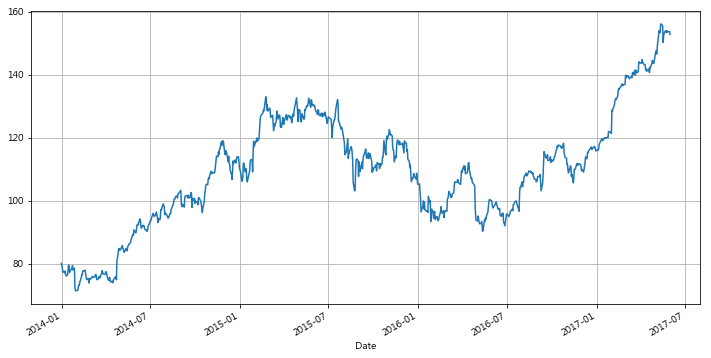

In [17]:
aapl_trunc = aapl[:'2017-05-31']
aapl_trunc['close'].plot(figsize=(12,6),grid=True)

In [18]:
df = pd.DataFrame({'ds':aapl_trunc.index,'y':aapl_trunc['close']})
df.reset_index(inplace=True)
del df['Date']

In [20]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=61)
future.tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
916,2017-07-27
917,2017-07-28
918,2017-07-29
919,2017-07-30
920,2017-07-31


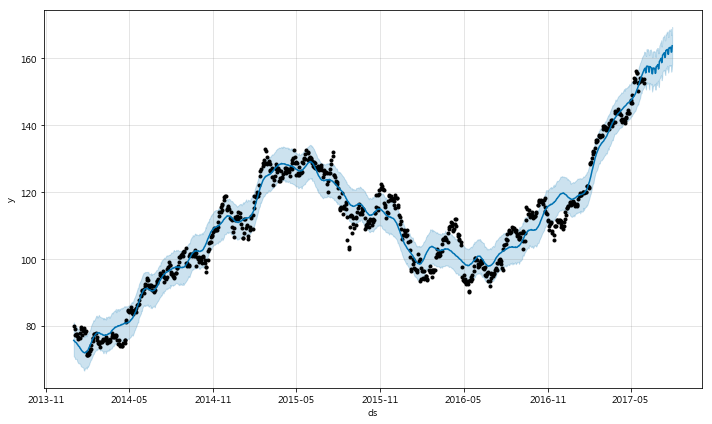

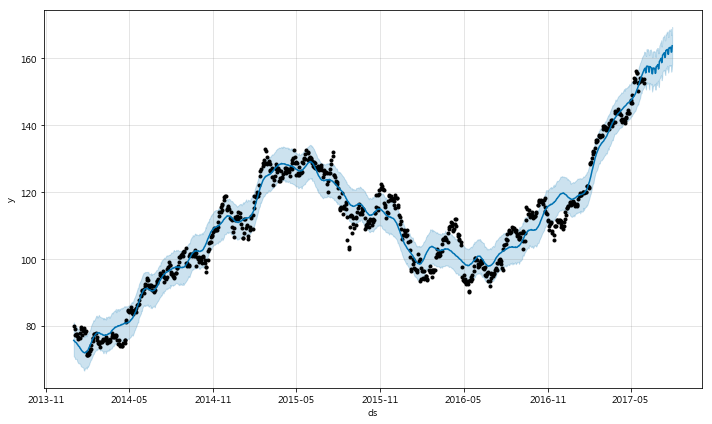

In [21]:
forecast = m.predict(future)
m.plot(forecast)

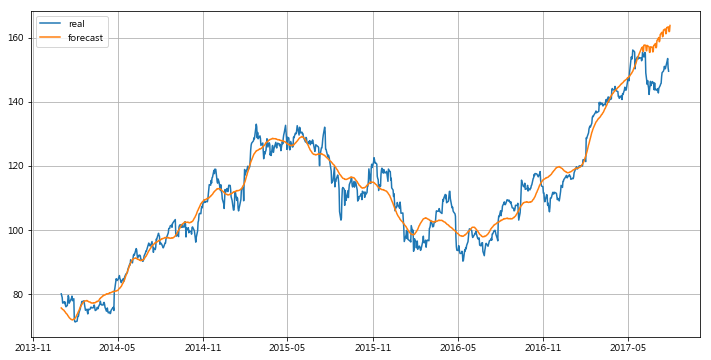

In [22]:
plt.figure(figsize=(12,6))
plt.plot(aapl.index, aapl['close'],label='real')
plt.plot(forecast['ds'],forecast['yhat'],label='forecast')
plt.grid()
plt.legend()
plt.show()

In [23]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y']=np.log(df['y'])

In [24]:
df['cap'] = 8.5

In [25]:
m=Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


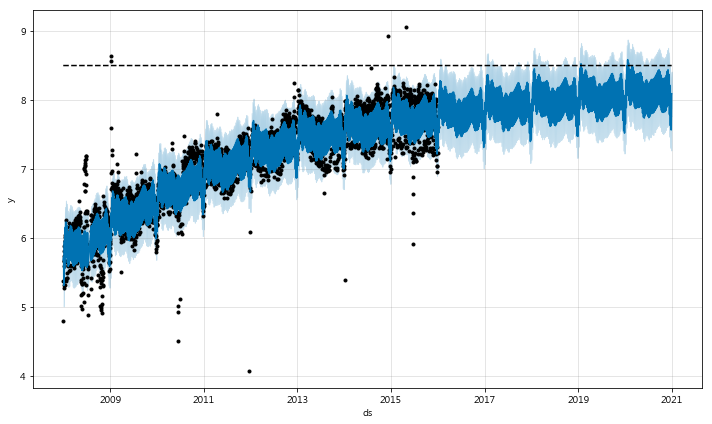

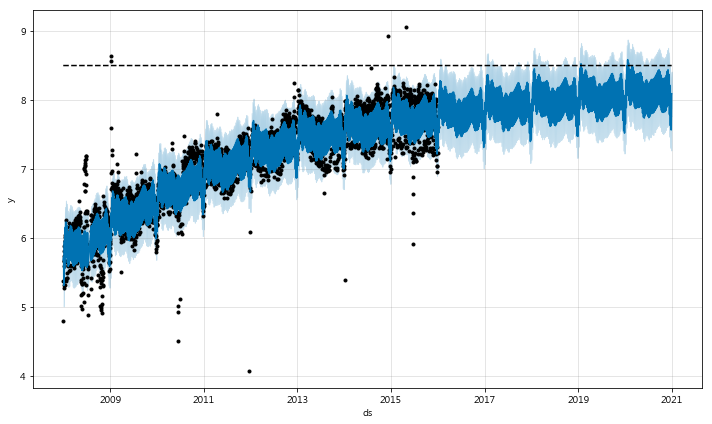

In [26]:
future = m.make_future_dataframe(periods=1826)
future['cap']=8.5
fcst = m.predict(future)
m.plot(fcst)

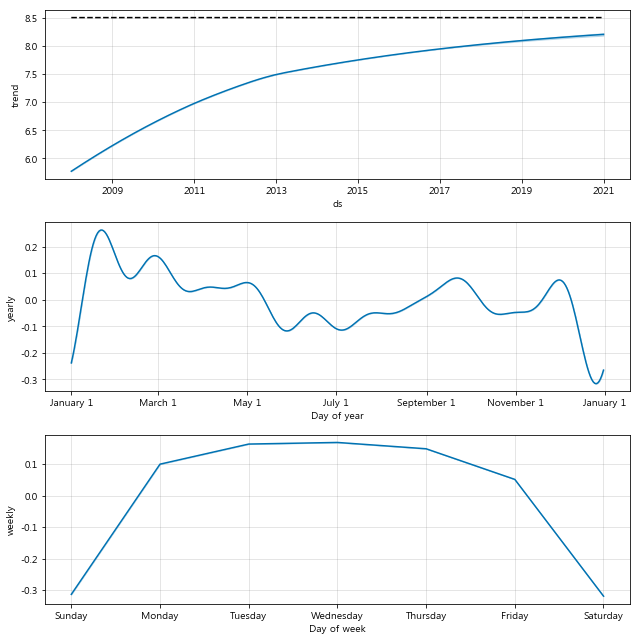

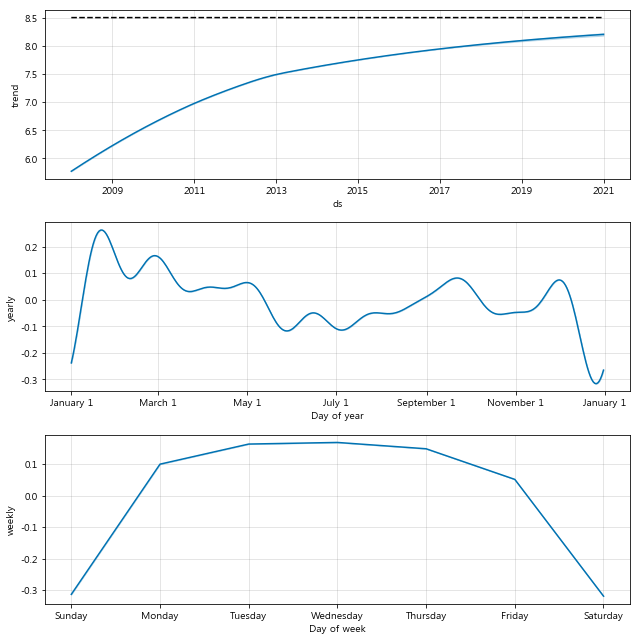

In [27]:
forecast = m.predict(future)
m.plot_components(forecast)